In [35]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=6e3cbf68febef72847b48230d38886a302dfa4cea995ff05e9980c0e3b97c79f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [40]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import wikipedia
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import files
upload=files.upload()

Saving megaGymDataset.csv to megaGymDataset.csv


In [22]:
data=pd.read_csv("megaGymDataset.csv")
print(data.head())

   Unnamed: 0                         Title  \
0           0        Partner plank band row   
1           1  Banded crunch isometric hold   
2           2         FYR Banded Plank Jack   
3           3                 Banded crunch   
4           4                        Crunch   

                                                Desc      Type    BodyPart  \
0  The partner plank band row is an abdominal exe...  Strength  Abdominals   
1  The banded crunch isometric hold is an exercis...  Strength  Abdominals   
2  The banded plank jack is a variation on the pl...  Strength  Abdominals   
3  The banded crunch is an exercise targeting the...  Strength  Abdominals   
4  The crunch is a popular core exercise targetin...  Strength  Abdominals   

  Equipment         Level  Rating RatingDesc  
0     Bands  Intermediate     0.0        NaN  
1     Bands  Intermediate     NaN        NaN  
2     Bands  Intermediate     NaN        NaN  
3     Bands  Intermediate     NaN        NaN  
4     Bands  

In [10]:
print(data.columns)

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')


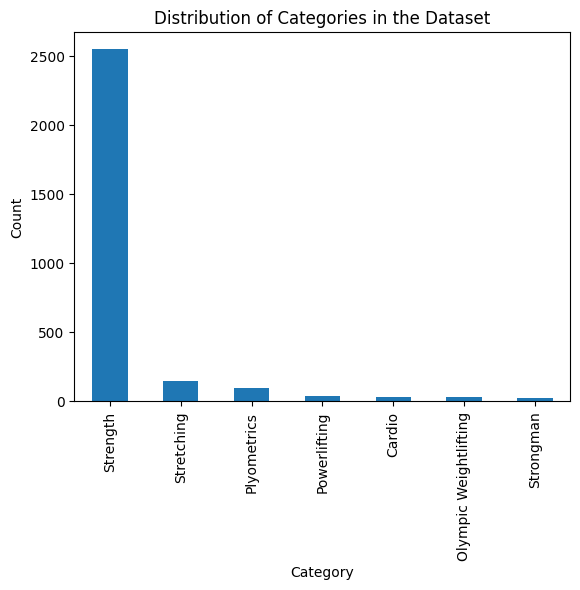

In [47]:
#Counting occurrences of a categorical variable :- Strength
category_counts = data["Type"].value_counts()
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.show()

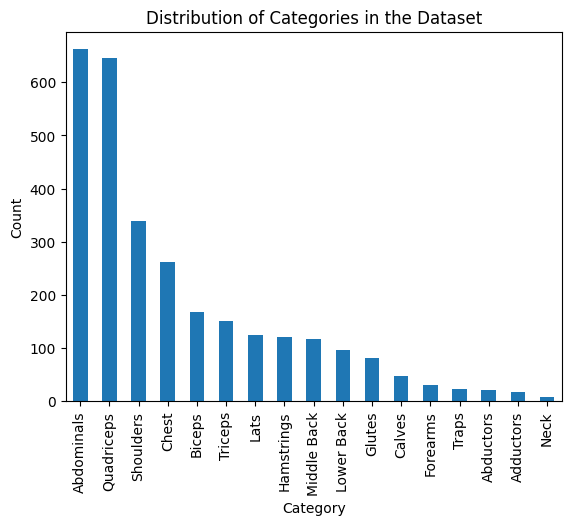

In [48]:
category_counts = data["BodyPart"].value_counts()
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.show()

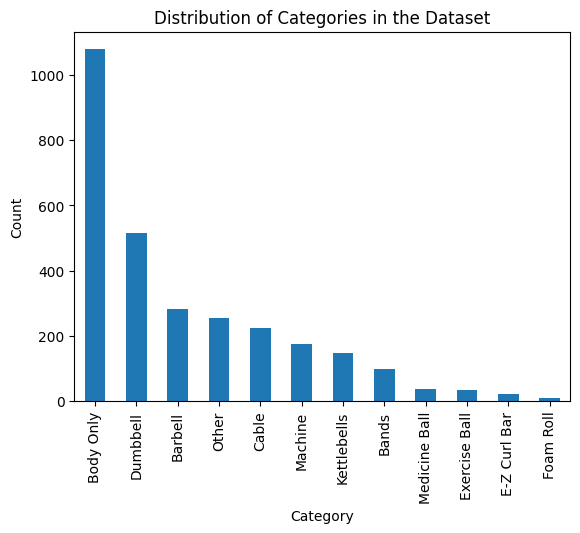

In [49]:
category_counts = data["Equipment"].value_counts()
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.show()

In [41]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [42]:
def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ''  # Return an empty string for missing/NaN values
    tokens = word_tokenize(text.lower())
    filtered_tokens = [ps.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

data['Desc'] = data['Desc'].apply(preprocess_text)

In [43]:
# Create a dictionary for mapping descriptions to exercises
exercise_dict = dict(zip(data['Desc'], data['Title']))

In [44]:
# Define a function to find the closest exercise
def find_closest_exercise(user_input):
    vectorizer = TfidfVectorizer()
    input_vector = vectorizer.fit_transform([preprocess_text(user_input)])
    exercise_vectors = vectorizer.transform(data['Desc'])
    similarities = cosine_similarity(input_vector, exercise_vectors)
    closest_index = similarities.argmax()
    closest_exercise = data.iloc[closest_index]['Title']
    return closest_exercise

In [45]:
# Chat bot loop
print("Bot: Hi! I'm a gym chat bot. How can I assist you today?")
while True:
    user_input = input("You: ")
    if user_input.lower() == "bye":
        print("Bot: Goodbye! Have a great day.")
        break

    closest_exercise = find_closest_exercise(user_input)
    if closest_exercise:
        exercise_details = data.loc[data['Title'] == closest_exercise].iloc[0]
        print(f"Bot: The exercise you might be looking for is: {closest_exercise}")
        print(f"Description: {exercise_details['Desc']}")
        print(f"Type: {exercise_details['Type']}")
        print(f"Body Part: {exercise_details['BodyPart']}")
        print(f"Equipment: {exercise_details['Equipment']}")
        print(f"Level: {exercise_details['Level']}")
        print(f"Rating: {exercise_details['Rating']} ({exercise_details['RatingDesc']})")
    else:
        try:
            # Fetch information from Wikipedia
            wiki_page = wikipedia.page(user_input)
            summary = wiki_page.content[:500].strip('=\n ')
            print(f"Bot: {summary}...")
        except wikipedia.exceptions.DisambiguationError as e:
            print(f"Bot: There are multiple pages related to '{user_input}'. Please be more specific.")
        except wikipedia.exceptions.PageError:
            print("Bot: I'm sorry, I couldn't find any information related to your query.")
        except Exception as e:
            print(f"Bot: An error occurred while processing your query: {e}")

Bot: Hi! I'm a gym chat bot. How can I assist you today?
You: chest
Bot: The exercise you might be looking for is: Two-way swing
Description: two-way kettlebel swing exerci altern chest-height kettlebel swing ( sometim call `` russian `` `` hardstyl `` swing ) overhead kettlebel swing ( sometim call `` american `` swing ) . swing variat work mani muscl , hamstr , glute , core , weight must travel farther overhead swing , 's slightli metabol demand work upper back shoulder . combo perform time rep work especi well circuit-styl full-bodi train . ca n't perform overhead swing without lower back shoulder pain , perform chest-height swing .
Type: Strength
Body Part: Abdominals
Equipment: Kettlebells
Level: Intermediate
Rating: nan (nan)
You: Dumbbell Raise
Bot: The exercise you might be looking for is: Dumbbell V-Sit Cross Jab
Description: dumbbel v-sit cross jab hybrid movement train abdomin shoulder muscl simultan . address multipl muscl group time-effici muscle-build circuit-styl workout